Preface: I used Python 3 (v 5.5.0) to write this project. Other software I used is annotated below in **boldface**.

# Sequencing  _Shewanella oneidensis_ Genomic Reads

In this notebook, I used **Bowtie2** to align reads/sequences, **samtools** to calculate coverage, and **matlibplot/pandas** to plot my results. All data was collected using an Illumina MiSeq. The used _S. oneidensis_ genomic reads were provided by BioE 131 ("Jamie").

A general outline of this lab:
1. Align the genomic read to the human genome to remove contamination
2. Align the genomic read to a _S. oneidensis_ reference genome
3. Generate coverage plots
4. Determine Jamie's biological sex

## 1. Removing _Homo sapiens_ Contamination from _S. oneidensis_ Genomic Reads

To align the Illumina MiSeq reads to the human genome, I ran **Bowtie2** on **Terminal** using the command:

    bowtie2 -p 4 --very-fast --no-unal -x /data/hg19/hg19 \ -U /data/lab6/illumina_reads.fastq -S output.sam --un unaligned.fastq

```hg19``` is the reference human genome file, while ```illumina_reads.fastq``` is the _S. oneidensis_ reads file. Using ```--un unaligned.fastq``` discards unaligned reads to another FASTQ file. Removing ```--un``` results in inclusion of contaminant reads.

### Results

    1124714 reads; of these:
      1124714 (100.00%) were unpaired; of these:
        1028379 (91.43%) aligned 0 times
        87274 (7.76%) aligned exactly 1 time
        9061 (0.81%) aligned >1 times
    8.57% overall alignment rate
    
There is thus **8.57% contamination** from human DNA in this sample.

I removed the contaminated reads by using the 1028379 unpaired reads stored in ```unaligned.fastq``` for subsequent analyses.

## 2. Alignment to Reference _S. oneidensis_ Genome

I ran **Bowtie2** again to align the filtered library ```unaligned.fastq``` from Part 1 to the given reference:

    bowtie2 -p 4 --very-fast --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 \ -U unaligned.fastq -S output2.sam --un unaligned2.fastq

Where ```shewanella_oneidensis_mr-1``` is the reference _S. oneidensis_ genome file and  ```illumina_reads.fastq``` the _S. oneidensis_ reads data file. The resulting outputs were ```output2.sam``` and ```unaligned2.fastq```.

### Results

    1028379 reads; of these:
      1028379 (100.00%) were unpaired; of these:
        299560 (29.13%) aligned 0 times
        687571 (66.86%) aligned exactly 1 time
        41248 (4.01%) aligned >1 times
    70.87% overall alignment rate

There is thus **70.87% alignment** (and **29.13%** unaligned) with the reference _S. oneidensis_ genome. Like before, using ```--un unaligned.fastq``` discards this alignment's unaligned reads to another FASTQ file. Removing ```--un``` results in inclusion of unaligned reads.

#### Using ```--very-sensitive``` Instead of ```--very-fast```

    bowtie2 -p 4 --very-sensitive --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 \ -U unaligned.fastq -S output3.sam --un unaligned3.fastq
    
I used the filtered library from the Bowtie2 run in Part 1 (```unaligned.fastq```) again but created additional outputs (```output3.sam```, ```unaligned3.fastq```), resulting in:

    1028379 reads; of these:
      1028379 (100.00%) were unpaired; of these:
        298112 (28.99%) aligned 0 times
        688180 (66.92%) aligned exactly 1 time
        42087 (4.09%) aligned >1 times
    71.01% overall alignment rate

Using ```--very-sensitive```, alignment with the reference _S. oneidensis_ genome increases by **0.14%**.

## 3. Coverage Plots

Using **samtools** on **Terminal**, I converted ```output2.sam``` to ```output2.bam```:

    samtools view -b output2.sam > output2.bam
    
I then ran the following commands to sort, index, and use "depth" to generate pertinent files:

    samtools sort output2.bam > output2.sorted.bam
    samtools index output2.sorted.bam
    samtools depth -a output2.sorted.bam > pileup2.tab

In [1]:
dat = open("pileup2.tab","r")
list1 = []
for line in dat:
    column3 = line.split('\t')
    list1.append(int(column3[2]))
    
# Determine the minimum, maximum, and mean coverage for all positions

import numpy

mean = numpy.mean(list1)
print(mean)
max = numpy.amax(list1)
print(max)
min = numpy.amin(list1)
print(min)

37.03830306625343
281
0


The filtered library has a mean depth of coverage 37.0383, maximum depth of coverage 281, and minimum depth of coverage 0.

### Plots

#### Position in Genome vs. Depth of Coverage

There seems to be general uniformity to depth of coverage, with exception to a few very notable spikes (>150 depth).

Text(0, 0.5, 'Depth of Coverage')

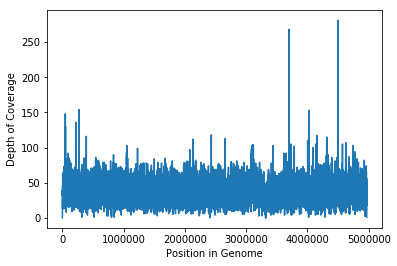

In [8]:
import matplotlib.pyplot as plt

plt.plot(list1)
plt.xlabel('Position in Genome') 
plt.ylabel('Depth of Coverage')

#### Depth of Coverage vs. Count

The curve is skewed to the left. This means that the large majority of reads has a depth of coverage about the mean (37.0383), and the reads with depth of coverage much greater than 37.0383 are very rare.

Text(0, 0.5, 'Count')

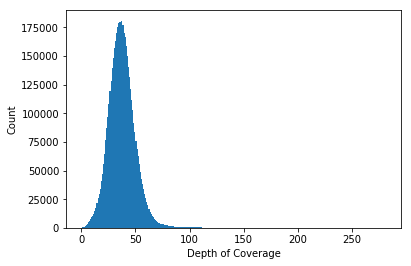

In [3]:
plt.hist(list1, 281)
plt.xlabel('Depth of Coverage') 
plt.ylabel('Count')

## 4. Extra Credit

**(a)** The first task at hand is to determine Jamie's biological sex. 

In [4]:
# Extract chromosome depth and length from pileup.tab (file with Jamie's genome)

data = open("pileup.tab", "r")
position, depth = [], []
ChrDepth, Length = {}, {}
for line in data.readlines():
    line = line[:-1]
    lineList = line.split("\t")
    position.append(int(lineList[1]))
    depth.append(int(lineList[2]))
    if len(lineList[0]) <= 5:
        ChrDepth[lineList[0]] = ChrDepth.get(lineList[0], 0) + int(lineList[2])
        Length[lineList[0]] = Length.get(lineList[0], 0) + 1

print("Chromosome Depth")
print(ChrDepth)
print("Chromosome Length")
print(Length)

Chromosome Depth
{'chr1': 2272919, 'chr2': 2408597, 'chr3': 1967583, 'chr4': 1894437, 'chr5': 1796144, 'chr6': 1693304, 'chr7': 1567929, 'chr8': 1443026, 'chr9': 1206697, 'chr10': 1323874, 'chr11': 1325997, 'chr12': 1316961, 'chr13': 967370, 'chr14': 890866, 'chr15': 825516, 'chr16': 797118, 'chr17': 787341, 'chr18': 754875, 'chr19': 560775, 'chr20': 599238, 'chr21': 350957, 'chr22': 352372, 'chrX': 1508460, 'chrY': 244489}
Chromosome Length
{'chr1': 2272970, 'chr2': 2408692, 'chr3': 1967638, 'chr4': 1894494, 'chr5': 1796203, 'chr6': 1693345, 'chr7': 1567931, 'chr8': 1443077, 'chr9': 1206747, 'chr10': 1323935, 'chr11': 1326046, 'chr12': 1316943, 'chr13': 967398, 'chr14': 890894, 'chr15': 825475, 'chr16': 797024, 'chr17': 787358, 'chr18': 754949, 'chr19': 560804, 'chr20': 599262, 'chr21': 350961, 'chr22': 352377, 'chrX': 1508504, 'chrY': 244099}


Text(0, 0.5, 'Depth of Coverage')

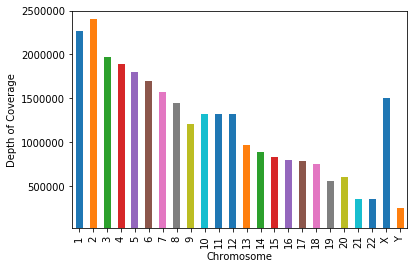

In [5]:
# Plot Depth of Coverage vs. Count

import collections
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'Chromosome':['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','X', 'Y'], 'DepthCov':[2272919,2408597,1967583,1894437,1796144,1693304,1567929,1443026,1206697,1323874,1325997,1316961,967370,890866,825516,797118,787341,754875,560775,599238,350957,352372,1508460,244489]})
ax = df.plot.bar(x='Chromosome', y='DepthCov')
ax.set_ylim(20000,2500000)
ax.legend_.remove()
plt.xlabel('Chromosome')
plt.ylabel('Depth of Coverage')

In [6]:
# Calculate average depth for each chromosome

AvgDepth = {}
for key in ChrDepth.keys():
    AvgDepth[key] = ChrDepth.get(key) / Length.get(key)
print(AvgDepth)

{'chr1': 0.9999775623963361, 'chr2': 0.9999605595069855, 'chr3': 0.9999720477038968, 'chr4': 0.9999699128104919, 'chr5': 0.9999671529331595, 'chr6': 0.9999757875683928, 'chr7': 0.9999987244336644, 'chr8': 0.9999646588504979, 'chr9': 0.9999585662943434, 'chr10': 0.9999539252304682, 'chr11': 0.9999630480390574, 'chr12': 1.0000136680175225, 'chr13': 0.9999710563801042, 'chr14': 0.999968570896201, 'chr15': 1.000049668372755, 'chr16': 1.0001179387320833, 'chr17': 0.9999784088051433, 'chr18': 0.9999019801337574, 'chr19': 0.9999482885286125, 'chr20': 0.9999599507394095, 'chr21': 0.9999886027222398, 'chr22': 0.99998581065166, 'chrX': 0.9999708320296135, 'chrY': 1.001597712403574}


Text(0, 0.5, 'Average Depth')

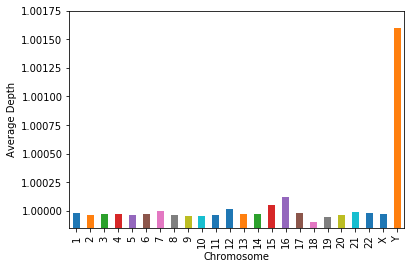

In [7]:
# Plot Chromosome vs. Average Depth for Jamie's genome

df = pd.DataFrame({'Chromosome':['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','X', 'Y'], 'AvgDepth':[0.9999775623963361,0.9999605595069855,0.9999720477038968,0.9999699128104919,0.9999671529331595,0.9999757875683928,0.9999987244336644,0.9999646588504979,0.9999585662943434,0.9999539252304682,0.9999630480390574,1.0000136680175225,0.9999710563801042,0.999968570896201,1.000049668372755,1.0001179387320833,0.9999784088051433,0.9999019801337574,0.9999482885286125,0.9999599507394095,0.9999886027222398,0.99998581065166,0.9999708320296135,1.001597712403574]})
ax = df.plot.bar(x='Chromosome', y='AvgDepth')
ax.set_ylim(0.99985,1.00175)
ax.legend_.remove()
plt.xlabel('Chromosome')
plt.ylabel('Average Depth')

As there is a relatively large average depth for ChrY in the genome, Jamie must be **male** (or at the minimum must have Y chromosome in his genome).

**(b)** Extra Credit 2 not attempted, but I would presumably extract regions with higher coverage than average by finsing all sequences with coverage larger than the average (i.e. average of all average depth values).

Then I would extract reads with these regions from ```output.sam``` and **NCBI BLAST** them.